In [1]:
import warnings


warnings.simplefilter("ignore", RuntimeWarning)

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)  

 

# warnings.filterwarnings(
#     "ignore",
#     category=anndata._core.views.ImplicitModificationWarning
# )

import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
#import spatialdata as sd
import seaborn as sns
import squidpy as sq
import anndata as ad

  

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig6"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# Acne genes in spatial atlas

In [3]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered.nohealthy"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]


def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST

 



In [4]:
sc.pp.normalize_total(adata_5k, target_sum=1e4)
sc.pp.log1p(adata_5k)

In [5]:
ad_i = adata_5k[adata_5k.obs["info_id6"] == "BK49_Past Lesional"]



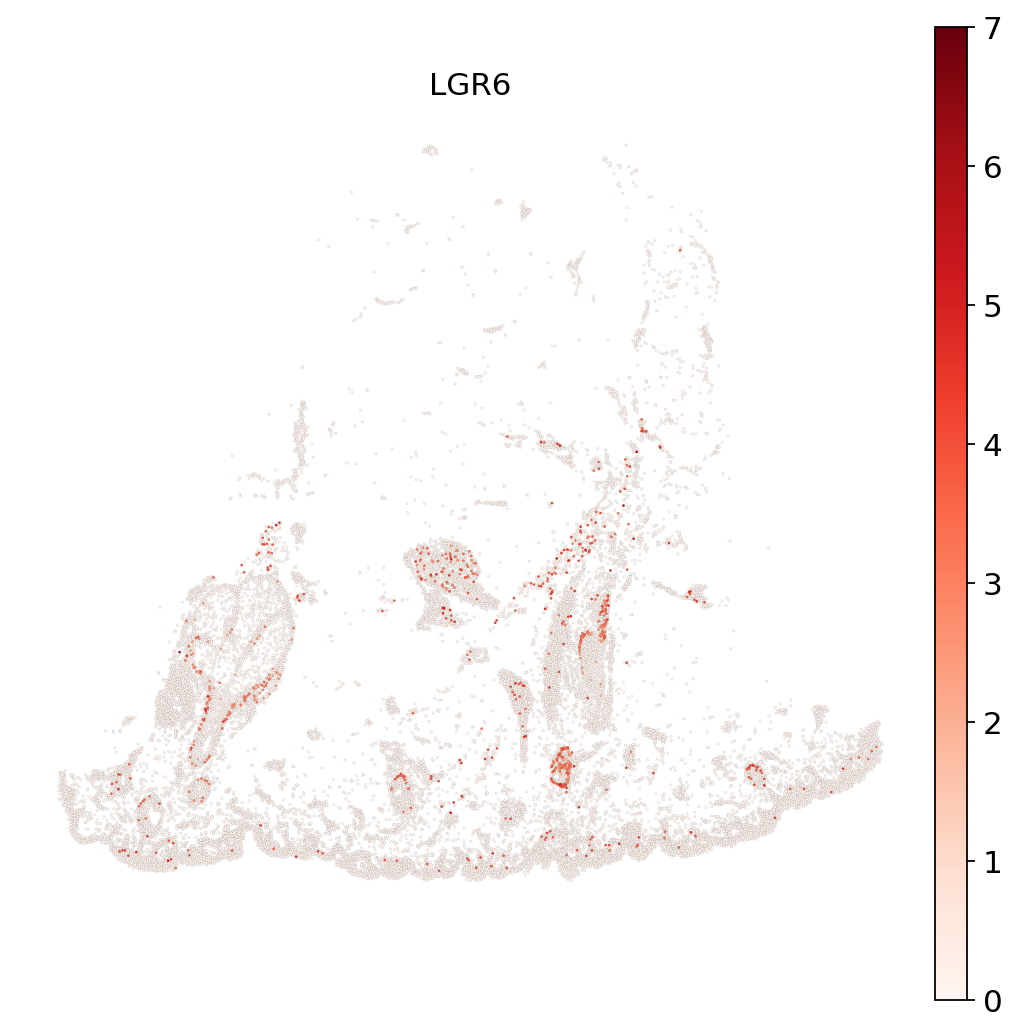

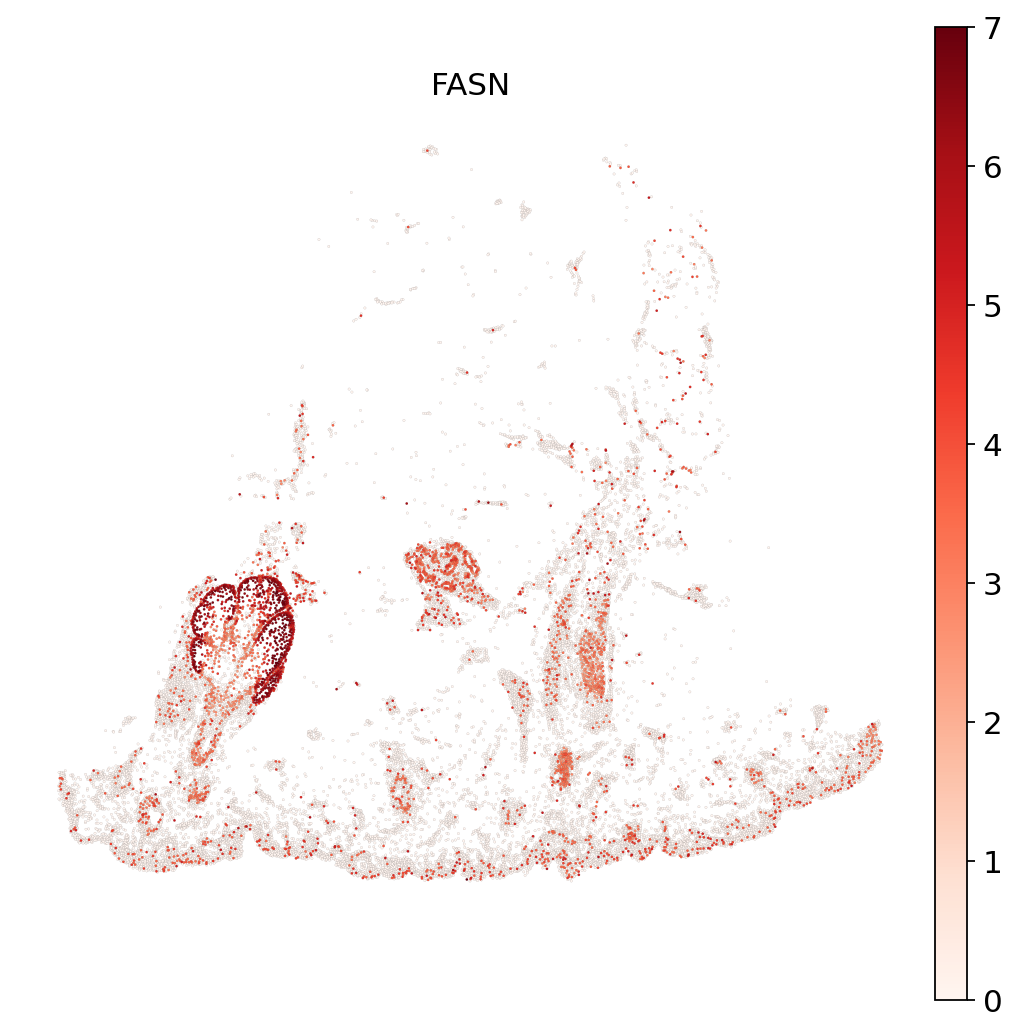

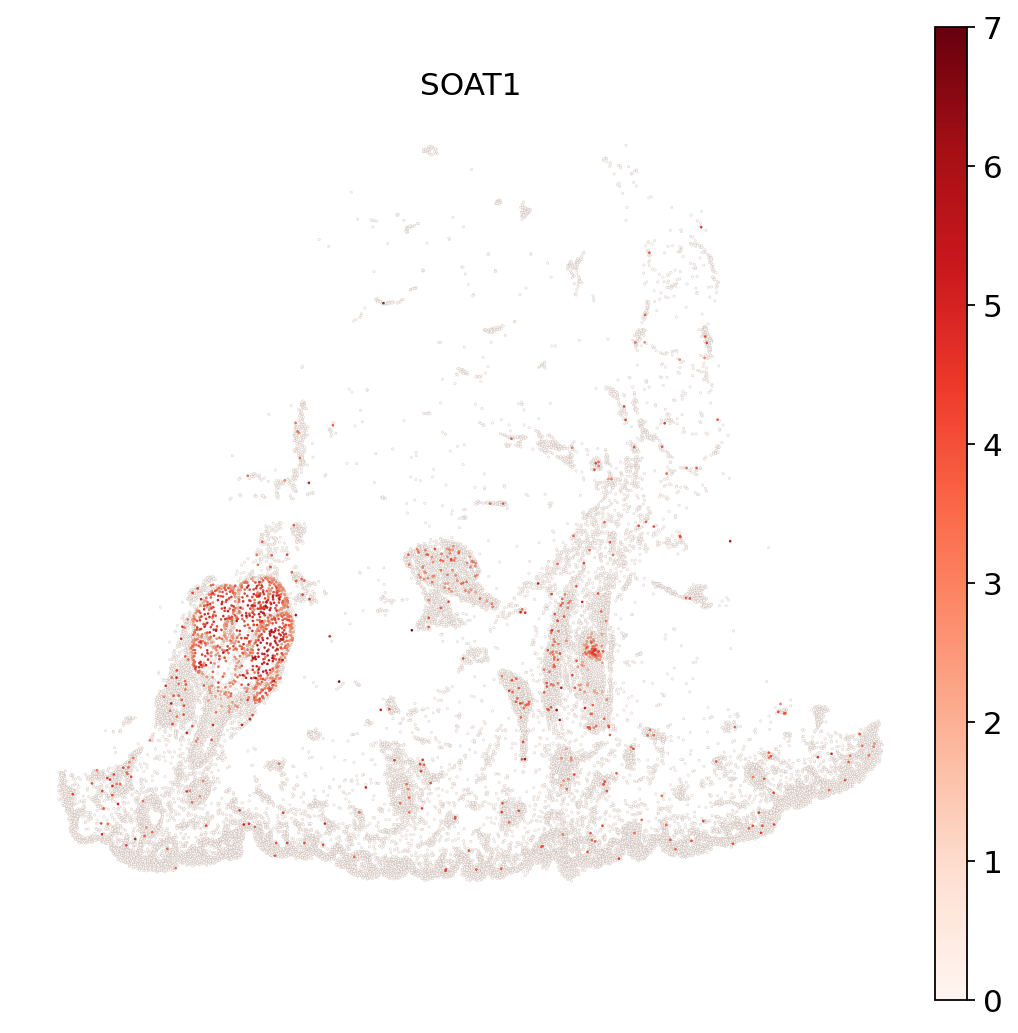

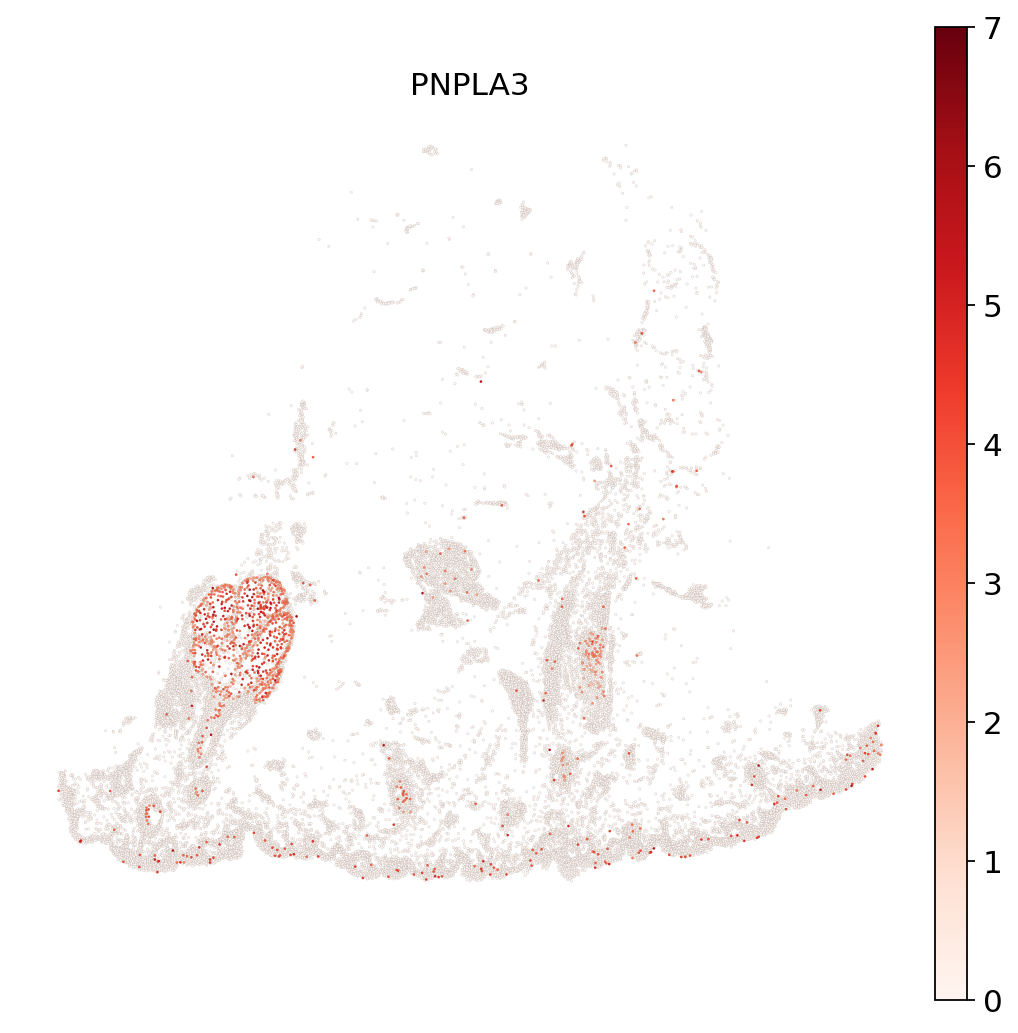

In [6]:
sc.pl.spatial(
                ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="LGR6",
                    spot_size=15,
                edgecolor="black",
                    linewidth=0.03,
                    vmax=7,
                 #   title=STATUS,# + "\n" + tissue_section_id,
                  #  save="fig1c_bigger.pdf"
                   # palette=cmap,
                    cmap="Reds",
                    save="6c_spatialLGR6.pdf"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

sc.pl.spatial(
                ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="FASN",
                    spot_size=15,
                edgecolor="black",
                    linewidth=0.03,
                    vmax=7,
                   # title=STATUS,# + "\n" + tissue_section_id,
                  #  save="fig1c_bigger.pdf"
                   # palette=cmap,
                    cmap="Reds",
                    save="6c_spatialFASN.pdf"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

sc.pl.spatial(
                ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="SOAT1",
                    spot_size=15,
                edgecolor="black",
                    linewidth=0.03,
                    vmax=7,
                   # title=STATUS,# + "\n" + tissue_section_id,
                  #  save="fig1c_bigger.pdf"
                   # palette=cmap,
                    cmap="Reds",
                    save="6c_spatialSOAT.pdf"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
    
    
    
sc.pl.spatial(
                ad_i,
                    #library_id="spatial",
                    #shape=None,
                    color="PNPLA3",
                    spot_size=15,
                edgecolor="black",
                    linewidth=0.03,
                    vmax=7,
                   # title=STATUS,# + "\n" + tissue_section_id,
                  #  save="fig1c_bigger.pdf"
                   # palette=cmap,
                    cmap="Reds",
                    save="6c_spatial1.pdf"
                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )

sc.settings.set_figure_params(dpi=100, dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

    
    
    

In [7]:
SPECIFIC_GWAS_GENES = ['SOAT1', 'PNPLA3', 'FASN', 'FADS2', 'LGR6', 'FST',
"MYEOV", 
                       "LYPLAL1", 
    "C8orf48" , 
                      ]

In [8]:
condition = adata_5k.obs["lvl5_annotation"].str.startswith(("Sebo", "Sweat", "KC_HF", "KC_Sebo", #"F6",
                                                           ))
adata_5k.obs["gwas"] = np.where(
    condition,
    adata_5k.obs["lvl5_annotation"],
    adata_5k.obs["lvl0"]
)


In [9]:
RENAME = {'Fibroblast': 'Fibroblast',
 'KC': 'Other KC',
 'KC_HF: HFSC': 'KC_HF: HFSC',
 'KC_HF: HS': 'KC_HF: HS',
 'KC_HF: IRS0': 'KC_HF: IRS0',
 'KC_HF: IRS1': 'KC_HF: IRS1',
 'KC_HF: IRS_Cuticle': 'KC_HF: IRS_Cuticle',
 'KC_HF: IRS_cycling': 'KC_HF: Matrix',
 'KC_HF: ORS-Bulb/infundibulum': 'KC_HF: SPON2+',
 'KC_HF: ORS0': 'KC_HF: ORS0',
 'KC_HF: ORS1': 'KC_HF: ORS1',
 'KC_HF: ORS2': 'KC_HF: ORS2',
 'KC_HF: ORS_cycling': 'KC_HF: ORS_cycling',
 'KC_HF: ORS_junction': 'KC_HF: ORS_junction',
 'KC_Sebocyte_DuctInner': 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction': 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter': 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal': 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner': 'KC_Sebocyte_GlandInner',
 'Myeloid': 'Myeloid',
 'Other': 'Other',
          'Schwann': 'Other',
 'Sweat gland':   'Sweat gland/duct',
 'Sweat gland Myoepithelial':  'Sweat gland/duct',
 'Sweat gland channel inner':   'Sweat gland/duct',
 'Sweat gland channel outer':   'Sweat gland/duct',
 'T': 'T',
 'VE/Pericyte/muscle': 'Endothelium/Pericyte/Muscle'}
adata_5k.obs["gwas"]=adata_5k.obs["gwas"].map(RENAME).fillna(adata_5k.obs["gwas"])
adata_5k.obs["gwas"].value_counts()

gwas
Other KC                          444270
Endothelium/Pericyte/Muscle       266408
Fibroblast                        226724
T                                 137847
Myeloid                           136255
Sweat gland/duct                   64627
Other                              40823
KC_Sebocyte_DuctOuter               8732
KC_Sebocyte_DuctInner               7151
KC_HF: ORS0                         7032
KC_Sebocyte_GlandBasal              5747
KC_HF: ORS_junction                 2913
KC_Sebocyte_GlandInner              2740
KC_Sebocyte_DuctInner_Junction      2471
KC_HF: ORS2                         1718
KC_HF: ORS1                         1558
KC_HF: HFSC                         1164
KC_HF: SPON2+                        517
KC_HF: IRS1                          425
KC_HF: Matrix                        271
KC_HF: IRS_Cuticle                    55
KC_HF: IRS0                           41
KC_HF: HS                             14
Name: count, dtype: int64

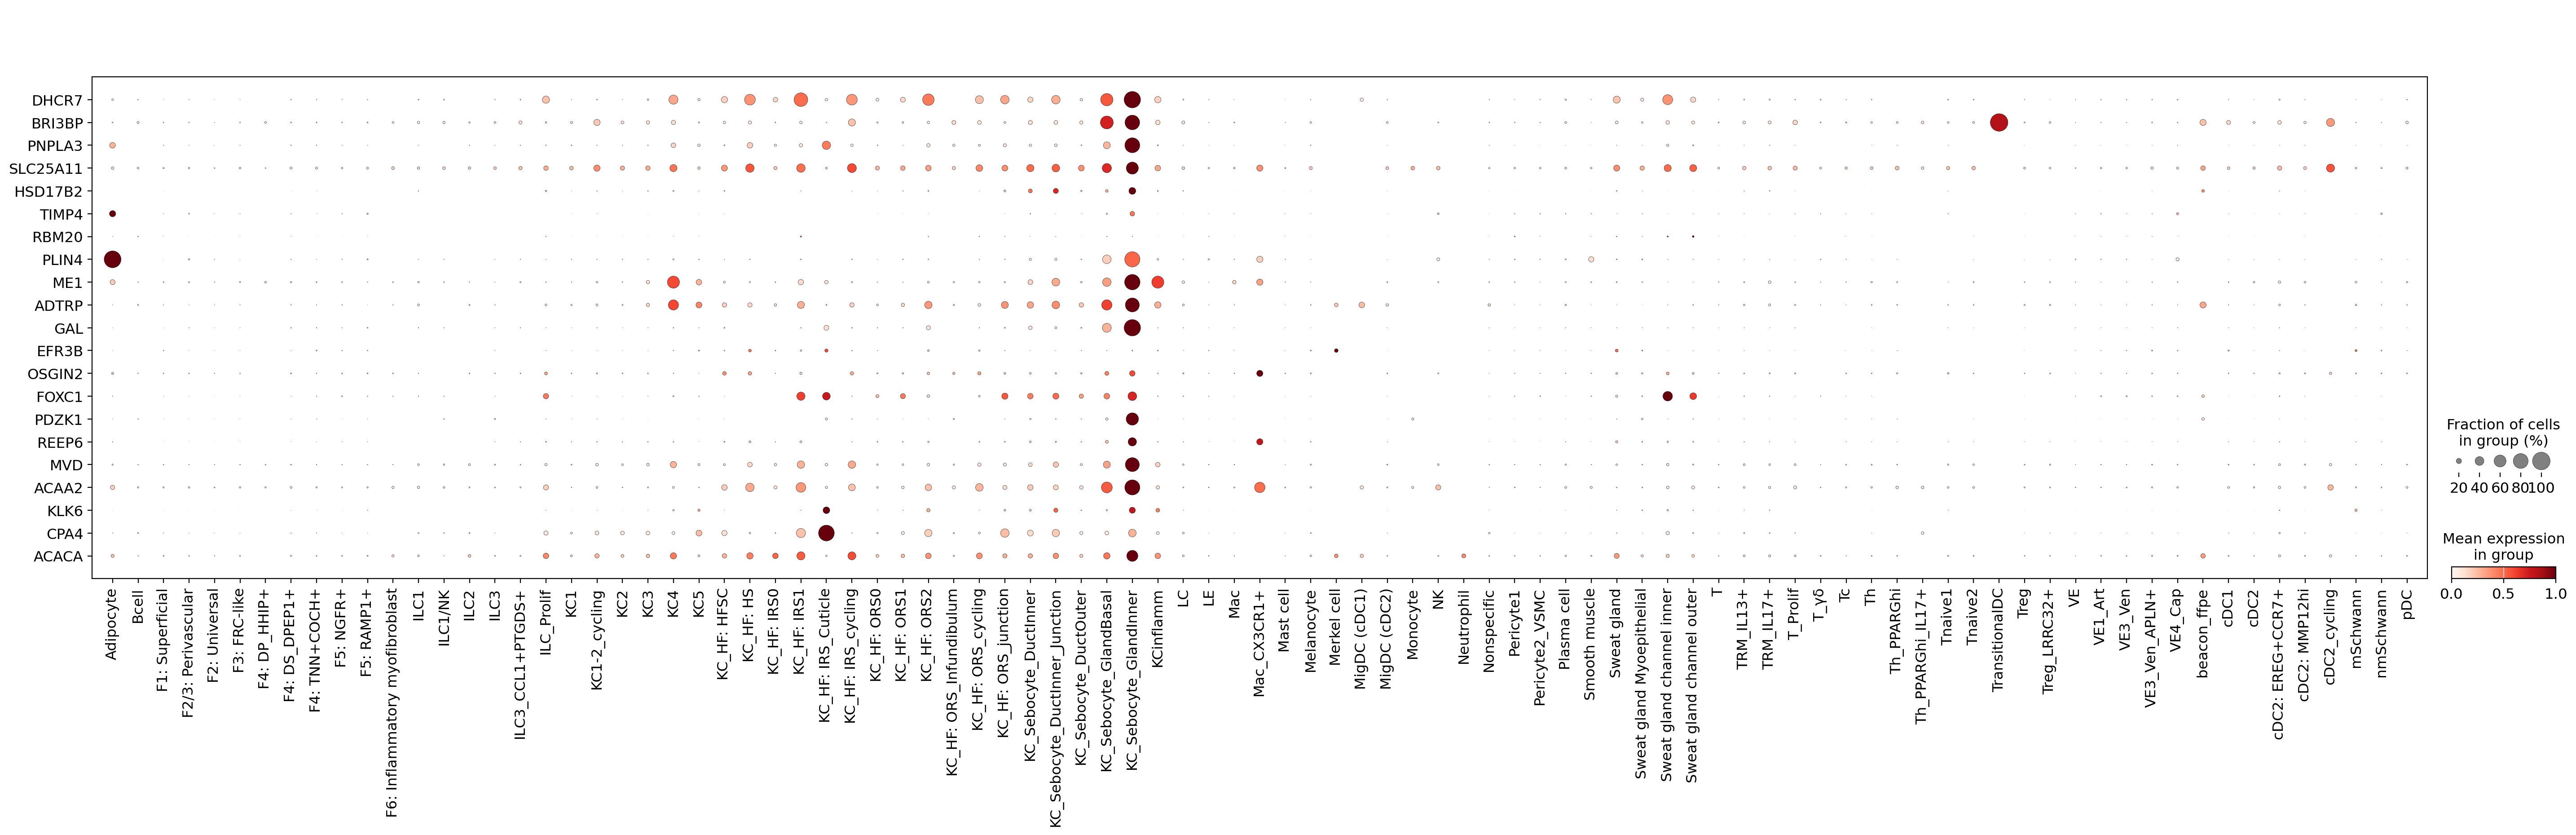

In [10]:
sebocyte_genes = [
    "DHCR7", "BRI3BP", "PNPLA3", "SLC25A11", "HSD17B2", "TIMP4", "RBM20", "PLIN4",
    "ME1", "ADTRP", "APOC1", "GAL", "EFR3B", "OSGIN2", "FOXC1", "PDZK1", "REEP6",
    "MVD", "ACAA2", "KLK6", "CPA4", "ACACA"
]
sc.pl.dotplot(
    adata_5k,
    remove_markers(sebocyte_genes),
    groupby="lvl4_annotation",
    standard_scale="var",
    dendrogram=False,
    swap_axes=True,
    #categories_order=[x for x in ORDER if x in adata_5k.obs["gwas"].unique()],
    #dot_max=0.8

) 



In [11]:
ORDER = [
 'KC_HF: HFSC',
 'KC_HF: HS',
 'KC_HF: IRS0',
 'KC_HF: IRS1',
 'KC_HF: IRS_Cuticle',
 'KC_HF: Matrix',
 'KC_HF: SPON2+',
 'KC_HF: ORS0',
 'KC_HF: ORS1',
 'KC_HF: ORS2',
 'KC_HF: ORS_cycling',
 'KC_HF: ORS_junction',
 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction',
 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner',
    
      'Sweat gland/duct',
    # 'Sweat gland',
 # 'Sweat gland Myoepithelial',
 # 'Sweat gland channel inner',
 # 'Sweat gland channel outer',
          'Other KC','Fibroblast',
 'Myeloid',


 'T',
'Endothelium/Pericyte/Muscle',
    'Other',]

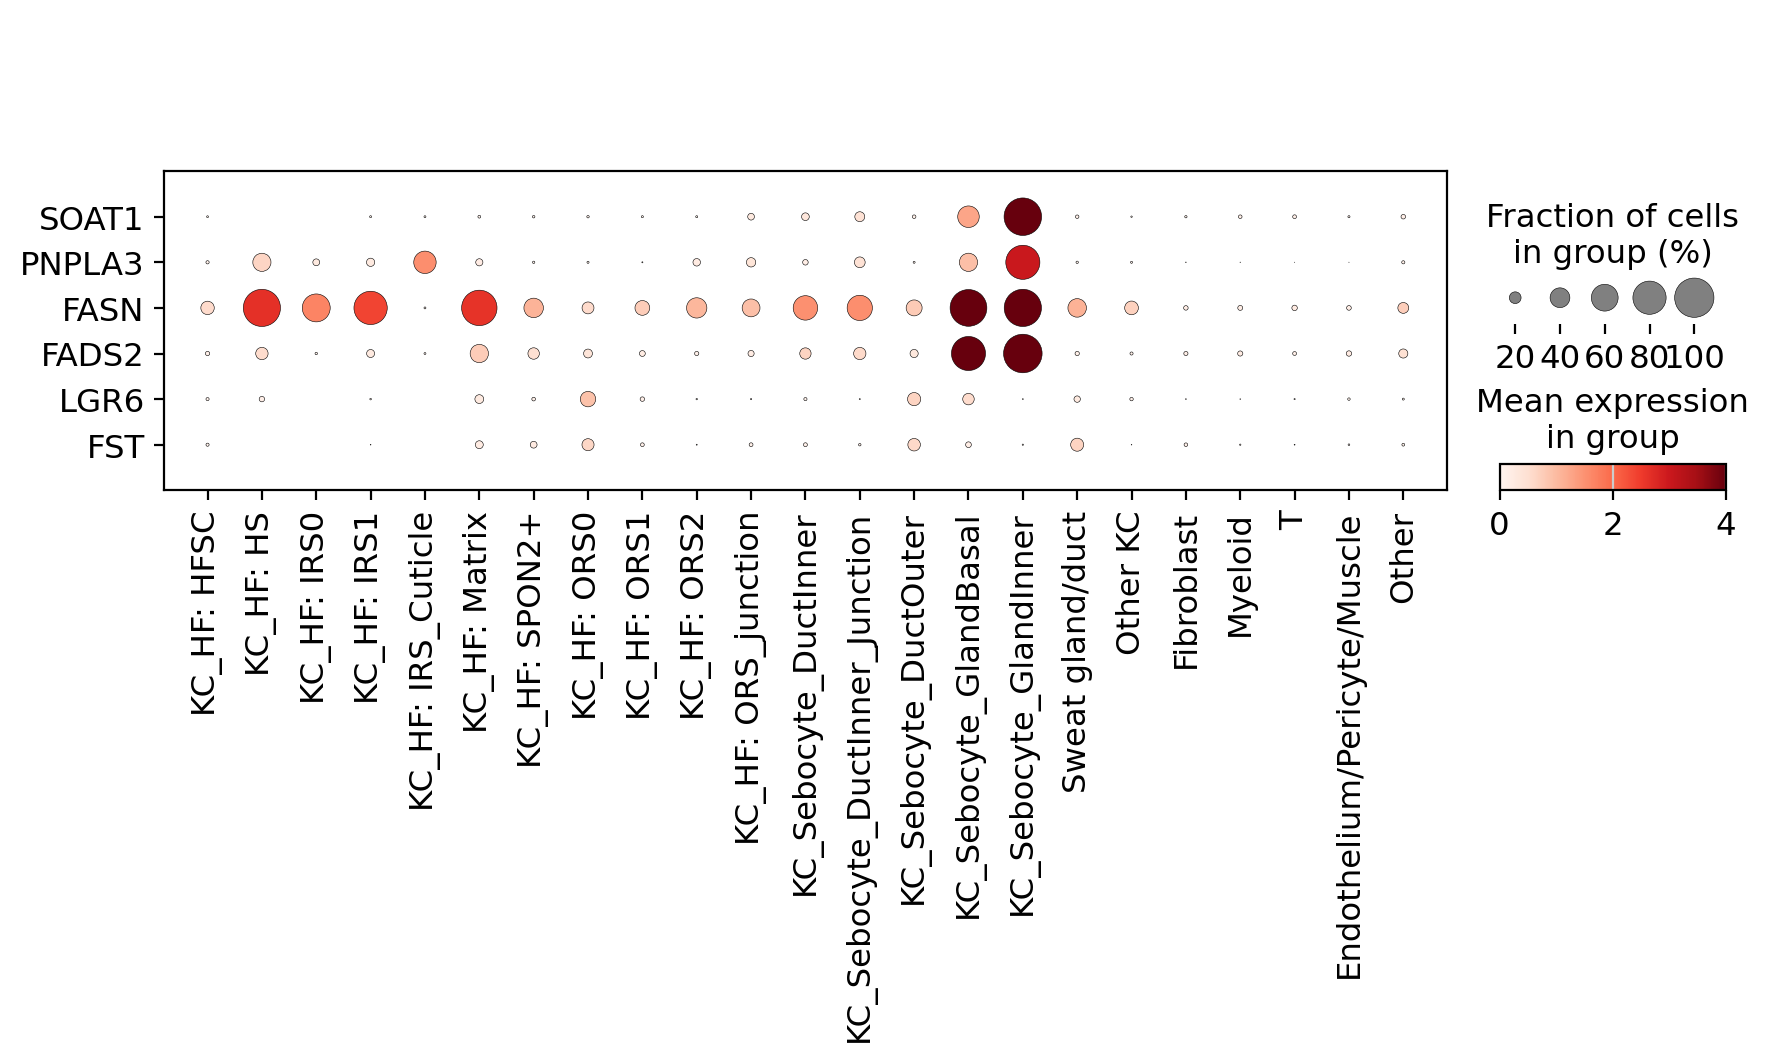

In [12]:
sc.pl.dotplot(
    adata_5k,
    remove_markers(SPECIFIC_GWAS_GENES),
    groupby="gwas",
    #standard_scale="var",
    vmax=4,
    dendrogram=False,
    swap_axes=True,
    categories_order=[x for x in ORDER if x in adata_5k.obs["gwas"].unique()],
    #dot_max=0.8
    save="6c_xenium_dotplot.pdf"

) 



# umap

In [13]:
adata_iii=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/model_scanvi5_acne_5959/adata_kcappendage_nonan_sebocytesonly2.h5ad")


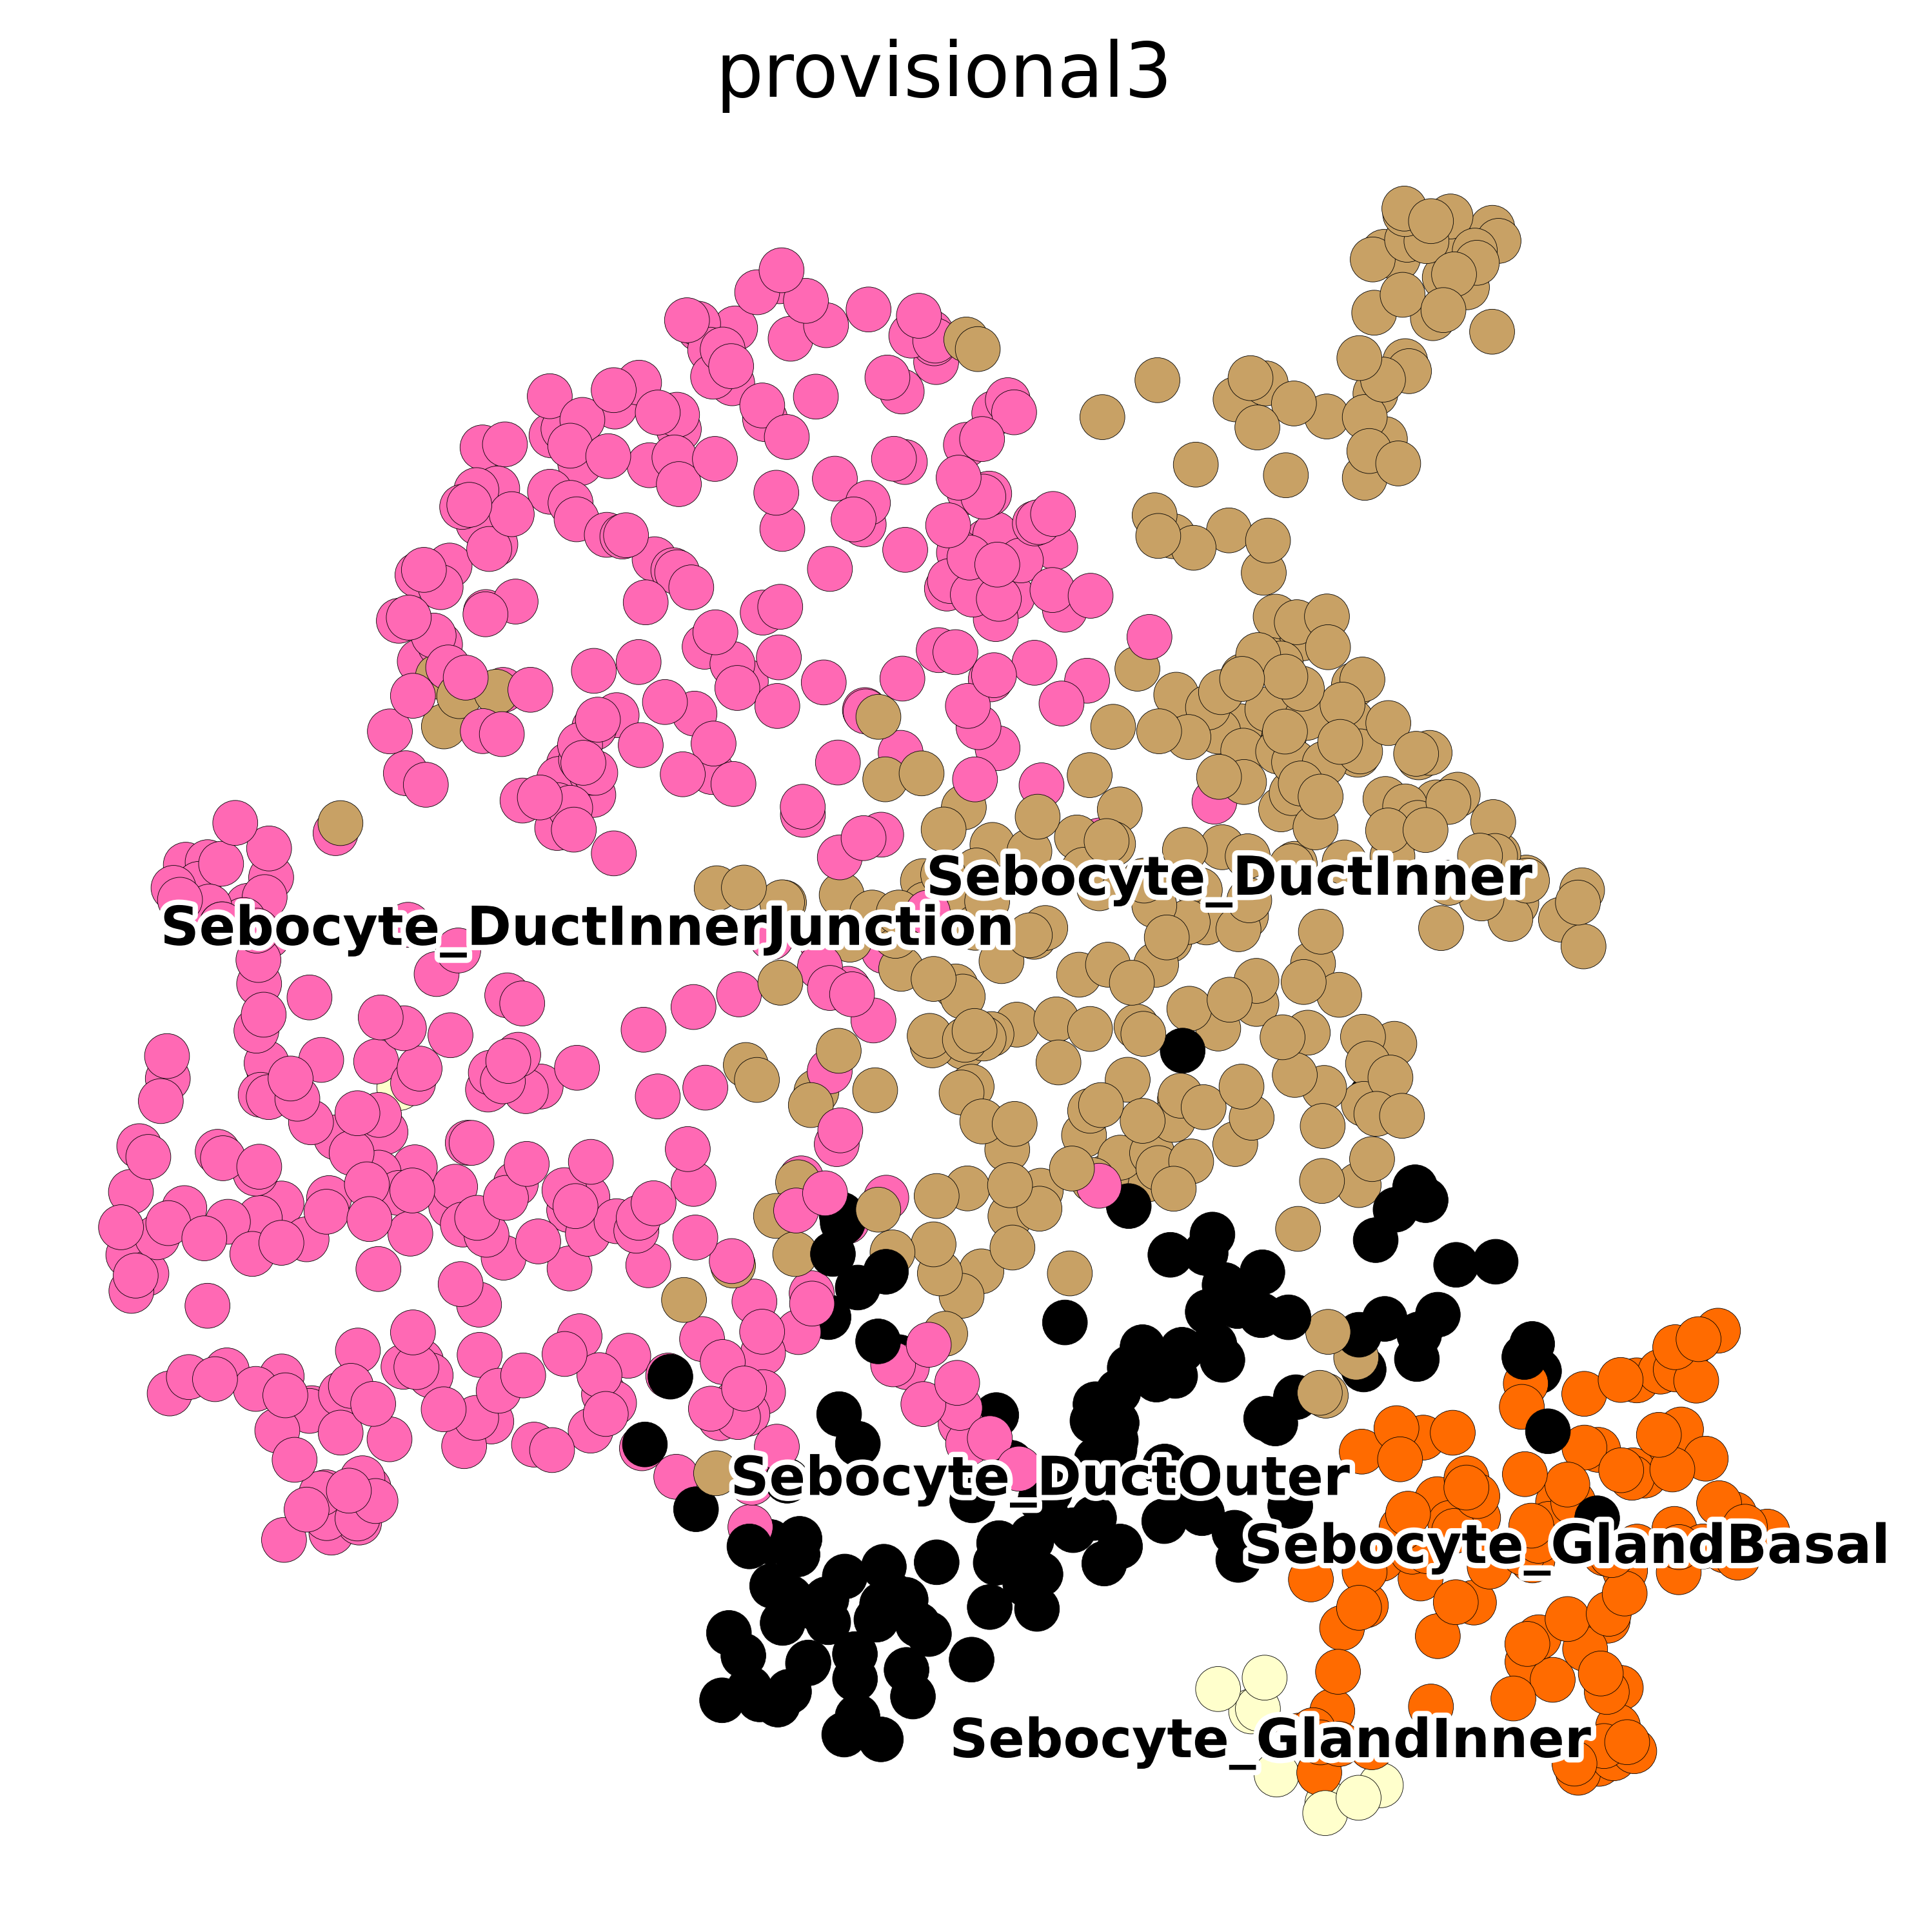

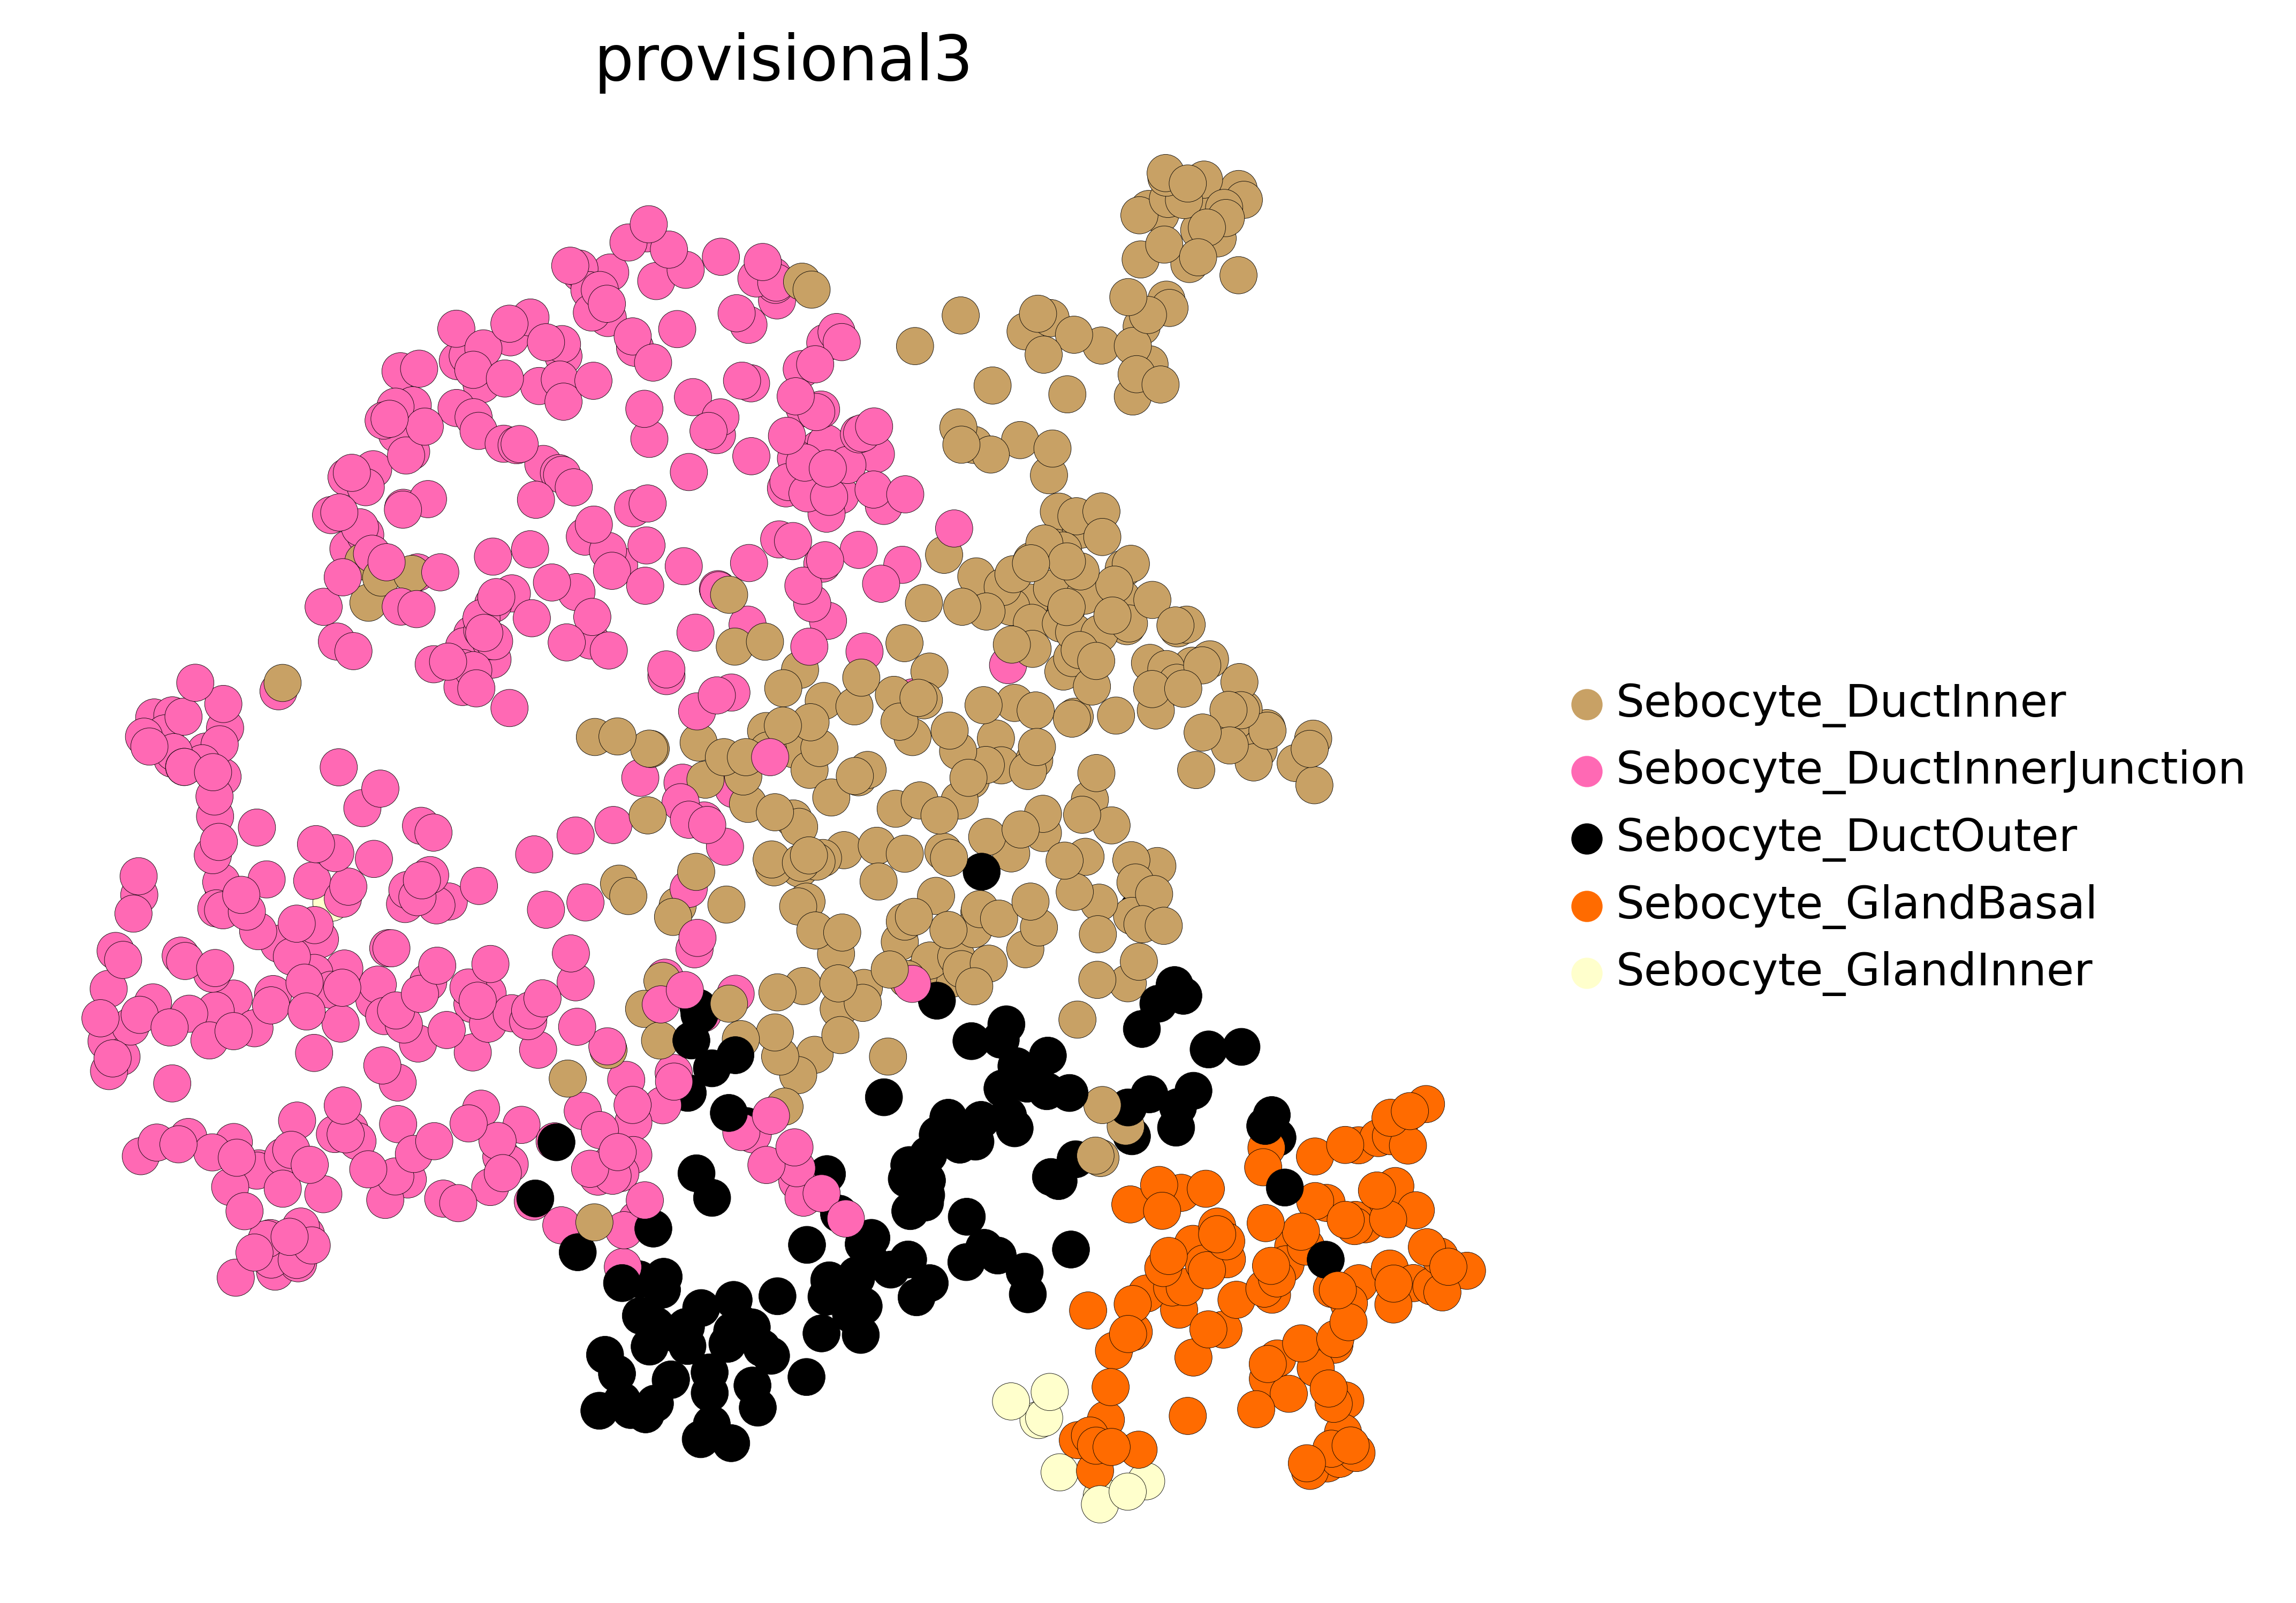

In [14]:
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(6,6))

sc.pl.umap(
adata_iii,
    color=[
    'provisional3',
],
#legend_loc="on data",
s=280,
    legend_fontsize=10,
    legend_fontoutline=2,
    edgecolor='black',
    linewidth=.1,
    save="6c_single_cell_.pdf",
    title='',
#legend_fontsize=10)
) 

